# Quickstart

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
# import packages and authenticate (if needed)
import numpy as np
import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web
# web.configure("YOUR API KEY GOES HERE")

In [2]:
# set up parameters of simulation (length scales are micrometers)
freq0 = td.C_0 / 0.75

In [3]:
# create structure
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), 
    medium=td.Medium(permittivity=2.0)
)

In [4]:
# create source
source = td.PointDipole(
    center=(-1.5, 0, 0),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=freq0 / 10.0),
    polarization="Ey",
)

In [5]:
# create monitor
monitor = td.FieldMonitor(
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields",
    colocate=True,
)

In [6]:
# Initialize simulation
sim = td.Simulation(
    size=(4, 3, 3),
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=25),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=120/freq0,
)

In [7]:
# visualize in 3D
sim.plot_3d()

In [8]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)


simulation grid is shaped [179, 147, 147] for 3 million cells.


In [9]:
# run simulation
data = td.web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=True)

[09:31:15] Created task 'quickstart' with task_id                               
           'fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1'.

           View task using web UI at                                            
           ]8;id=624032;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=129933;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\taskId]8;;\]8;id=624032;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\=]8;;\]8;id=786678;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\fdve]8;;\]8;id=624032;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\-a65fc275-cb18-]8;;\
           ]8;id=624032;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\4630-adf2-0a4e976bf5fbv1']8;;\.

Output()

[09:31:17] status = queued

Output()

[09:31:27] status = preprocess

[09:31:32] Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get  
           the billed FlexCredit cost after a simulation run.

           starting up solver

           running solver

           To cancel the simulation, use 'web.abort(task_id)' or                
           'web.delete(task_id)' or abort/delete the task in the web UI.        
           Terminating the Python script will not stop the job running on the   
           cloud.

Output()

[09:31:39] early shutoff detected, exiting.

           status = postprocess

Output()

[09:31:44] status = success

[09:31:45] View simulation result at                                            
           ]8;id=887611;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=889999;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\taskId]8;;\]8;id=887611;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\=]8;;\]8;id=811867;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\fdve]8;;\]8;id=887611;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\-a65fc275-cb18-]8;;\
           ]8;id=887611;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a65fc275-cb18-4630-adf2-0a4e976bf5fbv1\4630-adf2-0a4e976bf5fbv1']8;;\.

Output()

[09:31:46] loading SimulationData from data/data.hdf5

In [10]:
# see the log
print(data.log)


Simulation domain Nx, Ny, Nz: [179, 147, 147]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 4.0184e+06.
Using subpixel averaging: True
Number of time steps: 7.5140e+03
Automatic shutoff factor: 1.00e-05
Time step (s): 3.9959e-17


Compute source modes time (s):     0.0422
Compute monitor modes time (s):    0.0026
Rest of setup time (s):            2.1802

Running solver for 7514 time steps...
- Time step    300 / time 1.20e-14s (  4 % done), field decay: 1.00e+00
- Time step    498 / time 1.99e-14s (  6 % done), field decay: 1.00e+00
- Time step    601 / time 2.40e-14s (  8 % done), field decay: 2.60e-01
- Time step    901 / time 3.60e-14s ( 12 % done), field decay: 2.62e-03
- Time step   1202 / time 4.80e-14s ( 16 % done), field decay: 6.38e-05
- Time step   1502 / time 6.00e-14s ( 20 % done), field decay: 2.22e-06
Field decay smaller than shutoff factor, exiting solver.

Solver time (s):                   1.2144
Data write time (s):               0.0036



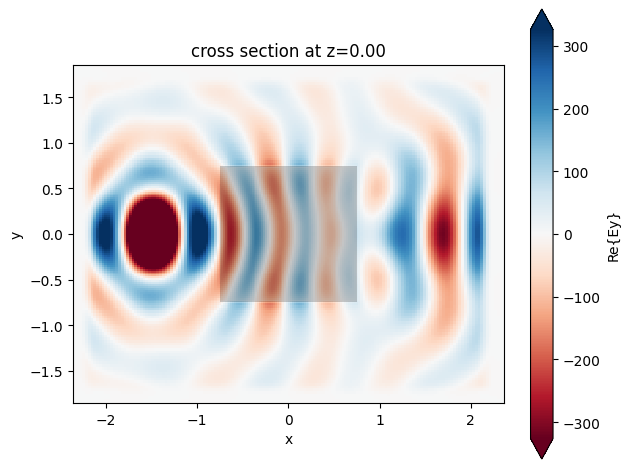

In [11]:
# plot the field data stored in the monitor
ax = data.plot_field("fields", "Ey", z=0)